# Basic Libraries

In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

import math
import random

from qiskit.providers.aer.noise import NoiseModel
from qiskit.aqua import QuantumInstance
from qiskit.providers.aer.noise import thermal_relaxation_error, ReadoutError, depolarizing_error

# provider = IBMQ.get_provider(hub='ibm-q')
# machine = provider.get_backend('ibmq_valencia')
from qiskit.test.mock import FakeLondon
machine = FakeLondon()
machine_noise_model = NoiseModel.from_backend(machine)
simulator = Aer.get_backend('qasm_simulator')


basis_gates = machine_noise_model.basis_gates

C:\Users\Eesh Gupta\anacondaaa\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


# Important Functions

In [2]:
#Local Hamiltonian Function
from VQEHamiltonian_funcs import Hammifier, circs

#Readout Mit Functions
#from ReadoutMit import prepare_circuit, modify_counts, symmetry

# Expectation Value/Running Functions
from Result_ReadoutMit_funcs import binaryToDecimal, dictToList, sampleExpecVal, countToEig, expecValForSamples, addDicts, prepare_circuit_normal, prepare_circuit, modify_counts, symmetry, evaluator

# Restricted Range Info

In [3]:
'''------------Interatomic Distance = 0.74--------------
HF energy: -1.831863646477506
# of electrons: 2
# of spin orbitals: 4
Number of qubits are : 2
[ 0.00172129 -0.00182397 -0.11217598]
VQE Result: -1.1011690791894007 Exact Energy: -1.1372838344885012
All energies have been calculated'''

'------------Interatomic Distance = 0.74--------------\nHF energy: -1.831863646477506\n# of electrons: 2\n# of spin orbitals: 4\nNumber of qubits are : 2\n[ 0.00172129 -0.00182397 -0.11217598]\nVQE Result: -1.1011690791894007 Exact Energy: -1.1372838344885012\nAll energies have been calculated'

# Noise Model

In [4]:
'''

def generateDepolarizingError(machine, gate, qubits)

def generateRelaxationError(machine, gate, qubits, t1, t2, amp = 1, custom_t = False):
    """
    Return a relaxation error
    """

def generateNoiseModel(machine, coherent = True, incoherent = False, readout = False, custom_t = False, t1 = None, t2 = None, reverse = False):
    """
    Returns a realistic copy of london noise model with custom t1, t2 times
    """

'''

from NoiseModel import generateDepolarizingError, generateRelaxationError, generateNoiseModel

In [5]:
 noise_model = generateNoiseModel(machine, coherent = True, incoherent = True, readout= True)

Original: 0.01 0.050000000000000044
Reverse: 0.01 0.050000000000000044
Original: 0.02 0.07666666666666666
Reverse: 0.02 0.07666666666666666
Original: 0.14 0.18999999999999995
Reverse: 0.14 0.18999999999999995
Original: 0.0033333333333332993 0.03
Reverse: 0.0033333333333332993 0.03
Original: 0.006666666666666667 0.043333333333333335
Reverse: 0.006666666666666667 0.043333333333333335


# Variational Form
For Hydrogen

In [6]:
from qiskit.chemistry.components.variational_forms import UCCSD
from qiskit.chemistry.components.initial_states import HartreeFock

initial_state = HartreeFock(
4,
2,
'parity'
) 
var_form = UCCSD(
            num_orbitals=4,
            num_particles=2,
            initial_state=initial_state,
            qubit_mapping='parity'
        )

# Running Circuits for different Param

In [7]:
counter = 0

def EnergyFinder(param):
    '''
    Input: param (1D array) for which to compute energy on VQE circ of H2
    Output: energy
    '''
    
    Hamiltonian = """II\nIZ\nZI\nZZ\nXX"""
    Hamiltonian_weights = [-1.053, 0.395, -0.395, -0.011, 0.181]
    backend = simulator
    global noise_model
    samples = 8192
    
    
    
    circ = var_form.construct_circuit(param).decompose()
    circuits = Hammifier(circ, Hamiltonian)
    circs_nr = circs(circuits)
    circs_r = circs(circuits)
    circs_ideal = circs(circuits)
    #print('no mit')
    noisy_r = evaluator(circs_r, samples, noise_model, Hamiltonian, Hamiltonian_weights, simulator, readout_mit = False)
    #print('mit')
    noisy_nr = evaluator(circs_nr, samples, noise_model, Hamiltonian, Hamiltonian_weights, simulator, readout_mit = True)
    #print('no mit')
    ideal = evaluator(circs_ideal, samples, None, Hamiltonian, Hamiltonian_weights, simulator, False)
    #print('done')
    return noisy_r, noisy_nr, ideal

def main():
    '''
    Choose param and compute mean
    '''
    d = -math.pi
    u = math.pi
    
    energies = []
    diff_r = []
    diff_nr = []
    params = []
    
    for i in range(1000):
        print(i)
    
        p1 = random.uniform(0.001, 0.002)
        p2 = random.uniform(-0.002, -0.001)
        p3 = random.uniform(-0.2, -0.1)


        noisy_r,noisy_nr, ideal = EnergyFinder([p1,p2,p3])
        energies.append([[p1,p2,p3], ideal, noisy_r, noisy_nr])
        diff_r.append(noisy_r-ideal)
        diff_nr.append(noisy_nr-ideal)
        
        print('Noisy diff is ' + str(noisy_r-ideal))
        print('Mitigated diff is ' + str(noisy_nr-ideal))
        
    return energies, diff_r, diff_nr
energies, diff_r, diff_nr = main()

0
Noisy diff is 0.09093334960937471
Mitigated diff is 0.061359576870611665
1
Noisy diff is 0.09431909179687503
Mitigated diff is 0.06368972615465496
2
Noisy diff is 0.08845507812499975
Mitigated diff is 0.036218609656402334
3
Noisy diff is 0.10083691406250006
Mitigated diff is 0.05706405683617599
4
Noisy diff is 0.08356665039062494
Mitigated diff is 0.04627342974950399
5
Noisy diff is 0.09976684570312488
Mitigated diff is 0.05589016769470678
6
Noisy diff is 0.09559082031249999
Mitigated diff is 0.06595354876539794
7
Noisy diff is 0.09915405273437483
Mitigated diff is 0.054253332355578276
8
Noisy diff is 0.09670898437499997
Mitigated diff is 0.05699826588920032
9
Noisy diff is 0.09677929687499998
Mitigated diff is 0.06603816749656599
10
Noisy diff is 0.1011162109374999
Mitigated diff is 0.06085023366425224
11
Noisy diff is 0.09597436523437486
Mitigated diff is 0.06766450016454884
12
Noisy diff is 0.10025341796874976
Mitigated diff is 0.06743602782308833
13
Noisy diff is 0.10032080078125

Noisy diff is 0.09948559570312487
Mitigated diff is 0.059093937204288904
111
Noisy diff is 0.10827783203125008
Mitigated diff is 0.06855785330836328
112
Noisy diff is 0.09006689453124994
Mitigated diff is 0.055012530763507206
113
Noisy diff is 0.09110058593750003
Mitigated diff is 0.06230261650784119
114
Noisy diff is 0.096447509765625
Mitigated diff is 0.057066259586767254
115
Noisy diff is 0.09174853515624992
Mitigated diff is 0.05637293963677448
116
Noisy diff is 0.10383203125000007
Mitigated diff is 0.05492237735138139
117
Noisy diff is 0.08255078124999993
Mitigated diff is 0.0464677347697271
118
Noisy diff is 0.104339599609375
Mitigated diff is 0.056983450186965934
119
Noisy diff is 0.1069157714843747
Mitigated diff is 0.06435357882135206
120
Noisy diff is 0.09105346679687487
Mitigated diff is 0.0677653626158996
121
Noisy diff is 0.09968920898437506
Mitigated diff is 0.06007210632249693
122
Noisy diff is 0.08858007812500013
Mitigated diff is 0.0564310635111418
123
Noisy diff is 0.

Noisy diff is 0.10276562499999997
Mitigated diff is 0.06436284549326543
219
Noisy diff is 0.08875439453124989
Mitigated diff is 0.057180679503872955
220
Noisy diff is 0.09530615234374995
Mitigated diff is 0.05322962776156093
221
Noisy diff is 0.10113183593749975
Mitigated diff is 0.06021176753042368
222
Noisy diff is 0.09228344726562487
Mitigated diff is 0.06300955576541489
223
Noisy diff is 0.09858862304687488
Mitigated diff is 0.061043128410218195
224
Noisy diff is 0.09715991210937491
Mitigated diff is 0.06280288789444088
225
Noisy diff is 0.09844580078124987
Mitigated diff is 0.06238748074299827
226
Noisy diff is 0.09244702148437489
Mitigated diff is 0.051316562571543045
227
Noisy diff is 0.10321582031249998
Mitigated diff is 0.0589076760316507
228
Noisy diff is 0.09598388671875002
Mitigated diff is 0.054192192329155287
229
Noisy diff is 0.09697875976562476
Mitigated diff is 0.06445922481923438
230
Noisy diff is 0.09812890624999981
Mitigated diff is 0.06277654896644136
231
Noisy dif

Noisy diff is 0.08705810546874981
Mitigated diff is 0.055584968747615315
327
Noisy diff is 0.08874975585937495
Mitigated diff is 0.06033021912440861
328
Noisy diff is 0.0959760742187501
Mitigated diff is 0.05321557497934548
329
Noisy diff is 0.09561328125000002
Mitigated diff is 0.059027075854024336
330
Noisy diff is 0.09607568359375007
Mitigated diff is 0.056698232350332
331
Noisy diff is 0.08884814453124967
Mitigated diff is 0.049778408023053
332
Noisy diff is 0.09259350585937509
Mitigated diff is 0.06504703901241982
333
Noisy diff is 0.09276318359375002
Mitigated diff is 0.05893074735052273
334
Noisy diff is 0.08688647460937515
Mitigated diff is 0.0470267276892018
335
Noisy diff is 0.09928417968750003
Mitigated diff is 0.04682627936841821
336
Noisy diff is 0.08984277343750002
Mitigated diff is 0.05189043708028063
337
Noisy diff is 0.09848339843749976
Mitigated diff is 0.055524862756600735
338
Noisy diff is 0.09735693359374986
Mitigated diff is 0.05154229696825596
339
Noisy diff is 0

Noisy diff is 0.09413110351562515
Mitigated diff is 0.05555783193585939
435
Noisy diff is 0.08723095703124994
Mitigated diff is 0.04895248033758781
436
Noisy diff is 0.09929614257812469
Mitigated diff is 0.057757166029696716
437
Noisy diff is 0.0915107421875
Mitigated diff is 0.05310012120583418
438
Noisy diff is 0.10290527343749989
Mitigated diff is 0.06876499118828194
439
Noisy diff is 0.08847729492187484
Mitigated diff is 0.054554273444654244
440
Noisy diff is 0.09364257812499988
Mitigated diff is 0.056758413700015
441
Noisy diff is 0.08583154296875006
Mitigated diff is 0.0519712421421894
442
Noisy diff is 0.09884667968750005
Mitigated diff is 0.052097905696734115
443
Noisy diff is 0.102015380859375
Mitigated diff is 0.056292634226667415
444
Noisy diff is 0.09911694335937493
Mitigated diff is 0.0654013230692918
445
Noisy diff is 0.08905371093750003
Mitigated diff is 0.05606528528979715
446
Noisy diff is 0.09940966796875006
Mitigated diff is 0.055783576341193575
447
Noisy diff is 0.0

Noisy diff is 0.08459887695312496
Mitigated diff is 0.06311197731847162
543
Noisy diff is 0.10107666015624994
Mitigated diff is 0.05954541886171616
544
Noisy diff is 0.09961621093750017
Mitigated diff is 0.05939123062616414
545
Noisy diff is 0.08428662109375007
Mitigated diff is 0.05690969658596612
546
Noisy diff is 0.09758666992187492
Mitigated diff is 0.0623888573431679
547
Noisy diff is 0.10353417968750012
Mitigated diff is 0.0549102036472644
548
Noisy diff is 0.0924523925781251
Mitigated diff is 0.05069395711710167
549
Noisy diff is 0.09899755859374992
Mitigated diff is 0.055434611097012754
550
Noisy diff is 0.09519091796875001
Mitigated diff is 0.05213474153884312
551
Noisy diff is 0.09181469726562486
Mitigated diff is 0.06164852804281051
552
Noisy diff is 0.09142773437500007
Mitigated diff is 0.05683807570559596
553
Noisy diff is 0.10100048828125008
Mitigated diff is 0.04935822667458423
554
Noisy diff is 0.08979028320312499
Mitigated diff is 0.05652980936164531
555
Noisy diff is 

Noisy diff is 0.09931665039062498
Mitigated diff is 0.05898137937366443
651
Noisy diff is 0.08669653320312476
Mitigated diff is 0.054838057916475336
652
Noisy diff is 0.09670336914062472
Mitigated diff is 0.04691349975436854
653
Noisy diff is 0.10194799804687482
Mitigated diff is 0.0691140655405793
654
Noisy diff is 0.08569873046874998
Mitigated diff is 0.04967366518572591
655
Noisy diff is 0.09469824218749978
Mitigated diff is 0.05488776143019303
656
Noisy diff is 0.09109692382812495
Mitigated diff is 0.058223916182558844
657
Noisy diff is 0.10918481445312489
Mitigated diff is 0.06780065688434833
658
Noisy diff is 0.07518603515624989
Mitigated diff is 0.05077773850711509
659
Noisy diff is 0.10105541992187494
Mitigated diff is 0.0611917960999504
660
Noisy diff is 0.094385986328125
Mitigated diff is 0.05856486481603573
661
Noisy diff is 0.10548315429687483
Mitigated diff is 0.060966699159130666
662
Noisy diff is 0.09996191406249999
Mitigated diff is 0.06144434309180413
663
Noisy diff is

Noisy diff is 0.0989348144531248
Mitigated diff is 0.05795121694711525
759
Noisy diff is 0.09592724609374981
Mitigated diff is 0.061671485549641636
760
Noisy diff is 0.08797387695312475
Mitigated diff is 0.05877822390825305
761
Noisy diff is 0.09284252929687486
Mitigated diff is 0.054941367969799426
762
Noisy diff is 0.10592382812499979
Mitigated diff is 0.06139073595133149
763
Noisy diff is 0.09174536132812505
Mitigated diff is 0.06178864373473747
764
Noisy diff is 0.08769140625000005
Mitigated diff is 0.054715250829899365
765
Noisy diff is 0.09128393554687475
Mitigated diff is 0.05201284447973875
766
Noisy diff is 0.1095095214843751
Mitigated diff is 0.05905416314913414
767
Noisy diff is 0.09135278320312512
Mitigated diff is 0.04111988157242075
768
Noisy diff is 0.09493408203125009
Mitigated diff is 0.05292012100312893
769
Noisy diff is 0.09521850585937497
Mitigated diff is 0.060513466009901595
770
Noisy diff is 0.09761718750000004
Mitigated diff is 0.06291830786401098
771
Noisy diff

Noisy diff is 0.09132568359374993
Mitigated diff is 0.05823339813940409
867
Noisy diff is 0.08844677734375006
Mitigated diff is 0.05597843676897929
868
Noisy diff is 0.09048803710937492
Mitigated diff is 0.049203652724167046
869
Noisy diff is 0.09756396484374985
Mitigated diff is 0.06969183758796071
870
Noisy diff is 0.09774389648437498
Mitigated diff is 0.0568521521935097
871
Noisy diff is 0.09726733398437493
Mitigated diff is 0.05843482894059049
872
Noisy diff is 0.09128735351562489
Mitigated diff is 0.049126228036286745
873
Noisy diff is 0.08946899414062504
Mitigated diff is 0.0686732085026518
874
Noisy diff is 0.10873510742187487
Mitigated diff is 0.06336861997052434
875
Noisy diff is 0.09928247070312501
Mitigated diff is 0.06058675732362251
876
Noisy diff is 0.0982072753906249
Mitigated diff is 0.04803424655859789
877
Noisy diff is 0.09789111328124989
Mitigated diff is 0.04682198962180295
878
Noisy diff is 0.09542553710937507
Mitigated diff is 0.06602167116195434
879
Noisy diff is

Noisy diff is 0.0909985351562499
Mitigated diff is 0.060789335917226905
975
Noisy diff is 0.09658935546875003
Mitigated diff is 0.057953815509577344
976
Noisy diff is 0.09528710937500007
Mitigated diff is 0.06232760058951481
977
Noisy diff is 0.09612060546875001
Mitigated diff is 0.06446741633450759
978
Noisy diff is 0.08188256835937513
Mitigated diff is 0.04733204192183704
979
Noisy diff is 0.09492675781249982
Mitigated diff is 0.05001206346821552
980
Noisy diff is 0.09171313476562482
Mitigated diff is 0.0508205472196408
981
Noisy diff is 0.10309326171874966
Mitigated diff is 0.05418019354994108
982
Noisy diff is 0.09128027343749978
Mitigated diff is 0.05412784246460989
983
Noisy diff is 0.10438500976562526
Mitigated diff is 0.056467924322309404
984
Noisy diff is 0.08397607421875009
Mitigated diff is 0.05004262277978122
985
Noisy diff is 0.0945310058593749
Mitigated diff is 0.061966151735634245
986
Noisy diff is 0.10147924804687491
Mitigated diff is 0.05479264102325643
987
Noisy diff 

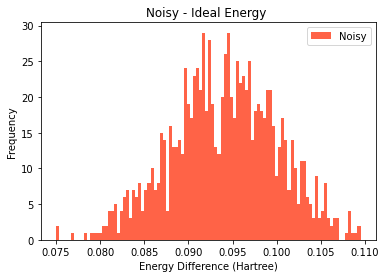

In [8]:
import numpy as np
import matplotlib.pyplot as plt

a = plt.figure()
plt.hist(diff_r, bins=100, color = "tomato", label = 'Noisy')
#plt.hist(diff_nr, bins=100, color = "lightcoral", label = 'Mitigated')
plt.title("Noisy - Ideal Energy ")
plt.xlabel("Energy Difference (Hartree)")
plt.ylabel("Frequency")
plt.legend()
plt.show()
a.savefig('SchnMethod_noisy_restricted_full.png', dpi = 1000)

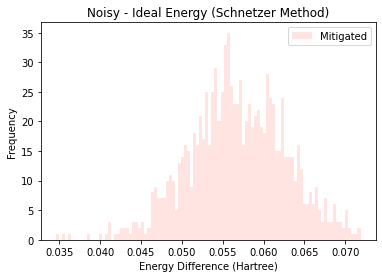

In [9]:
a = plt.figure()
#plt.hist(diff_r, bins=100, color = "red", label = 'Noisy')
plt.hist(diff_nr, bins=100, color = "mistyrose", label = 'Mitigated')
plt.title("Noisy - Ideal Energy (Schnetzer Method)")
plt.xlabel("Energy Difference (Hartree)")
plt.ylabel("Frequency")
plt.legend()
plt.show()
a.savefig('SchnMethod_Mitigated_Restricted_full.png', dpi = 1000)

In [10]:
energies

[[[0.0013182285519362318, -0.0012701694795841877, -0.11195130284980254],
  -1.0984283757626683,
  -1.0074950261532936,
  -1.0370687988920566],
 [[0.0016923176156300145, -0.0017483128591364058, -0.14807891540054563],
  -1.0875065007626685,
  -0.9931874089657935,
  -1.0238167746080136],
 [[0.0019246071863349705, -0.0011027220275292725, -0.18843344532281908],
  -1.0566891179501683,
  -0.9682340398251685,
  -1.020470508293766],
 [[0.0010108485835923823, -0.001134121676930878, -0.13947788264426408],
  -1.0875829167782936,
  -0.9867460027157935,
  -1.0305188599421176],
 [[0.0014925149142316326, -0.0013287173997325763, -0.19912076601764803],
  -1.0552008367001684,
  -0.9716341863095435,
  -1.0089274069506644],
 [[0.0014476284359959003, -0.001468889375452023, -0.1468454360002447],
  -1.0830345769345433,
  -0.9832677312314184,
  -1.0271444092398365],
 [[0.0011366503372708344, -0.0018510402085706007, -0.11475417831792561],
  -1.0946920476376685,
  -0.9991012273251685,
  -1.0287384988722705],
 [[

In [11]:
diff_r

[0.09093334960937471,
 0.09431909179687503,
 0.08845507812499975,
 0.10083691406250006,
 0.08356665039062494,
 0.09976684570312488,
 0.09559082031249999,
 0.09915405273437483,
 0.09670898437499997,
 0.09677929687499998,
 0.1011162109374999,
 0.09597436523437486,
 0.10025341796874976,
 0.10032080078125016,
 0.08839794921874988,
 0.09149633789062483,
 0.10054223632812498,
 0.08723779296875,
 0.0831528320312499,
 0.10517089843749994,
 0.09169555664062479,
 0.1068393554687499,
 0.08653173828125005,
 0.09440209960937507,
 0.09816235351562497,
 0.08597607421874986,
 0.095503662109375,
 0.09249194335937494,
 0.10555737304687507,
 0.10076245117187488,
 0.09397412109375003,
 0.09979125976562508,
 0.09331347656249989,
 0.09485375976562505,
 0.08411645507812493,
 0.09500439453124998,
 0.09611108398437507,
 0.08611279296874996,
 0.09713354492187487,
 0.09087915039062522,
 0.09583764648437498,
 0.09852807617187476,
 0.0799409179687498,
 0.09395727539062504,
 0.09468212890624983,
 0.1019353027343747

In [12]:
diff_nr

[0.061359576870611665,
 0.06368972615465496,
 0.036218609656402334,
 0.05706405683617599,
 0.04627342974950399,
 0.05589016769470678,
 0.06595354876539794,
 0.054253332355578276,
 0.05699826588920032,
 0.06603816749656599,
 0.06085023366425224,
 0.06766450016454884,
 0.06743602782308833,
 0.0718543443734545,
 0.05843050249446735,
 0.05390474097842257,
 0.05713465489585534,
 0.04405808901385044,
 0.058675121453178214,
 0.07024806321066102,
 0.05851310101107399,
 0.056007311042906904,
 0.05373596915779533,
 0.059396720376610146,
 0.04617061363161534,
 0.05295127628096741,
 0.053030974857390945,
 0.05670009192018255,
 0.06305878059657366,
 0.06518347103870248,
 0.054216529005933545,
 0.0705364822406328,
 0.05651448269612325,
 0.05716186290922609,
 0.05173944047822343,
 0.055475146245898,
 0.051218159012137,
 0.058186698240995316,
 0.06388368311918113,
 0.0633618979056969,
 0.058999262837819755,
 0.05673002196371324,
 0.042487004147111485,
 0.062277771376119784,
 0.059628669860817274,
 0.0

# Without Readout